In [1]:
# Adopted from https://medium.com/ai-made-simple/understanding-polynomial-regression-d963ebb7cc6e
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [11]:
def make_data(n=50, noise=0.3):
    x = np.random.rand(n) * 10
    err = np.random.normal(size=n) * noise
    y = np.sin(x) + err
    # The reshaping to `-1, 1` is often done when you have a 1D array and you need 
    # to transform it to a 2D array for certain operations, especially when using 
    # some machine learning libraries that expect 2D input.
    return x.reshape(-1, 1), y.reshape(-1, 1)

In [22]:
X_train, y_train = make_data()
print("Training set", X_train.shape, y_train.shape)

X_test, y_test = make_data(n=25)
print("Testing set", X_test.shape, y_test.shape)

Training set (50, 1) (50, 1)
Testing set (25, 1) (25, 1)


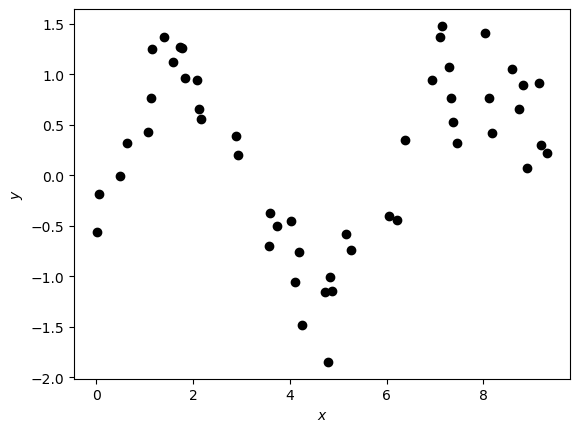

In [19]:
plt.scatter(X_train, y_train, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2):
    return Pipeline([('poly', PolynomialFeatures(degree)),
                     ('reg', LinearRegression())])

In [21]:
model = PolynomialRegression(5)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('reg', LinearRegression())])

In [24]:
train_score = model.score(X_train, y_train)
print(f'Score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'Score (test): {test_score:.5f}')

Score (train): 0.77281
Score (test): 0.44883


In [25]:
model = PolynomialRegression(20)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('reg', LinearRegression())])

In [26]:
train_score = model.score(X_train, y_train)
print(f'Score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'Score (test): {test_score:.5f}')

Score (train): 0.83250
Score (test): 0.76576


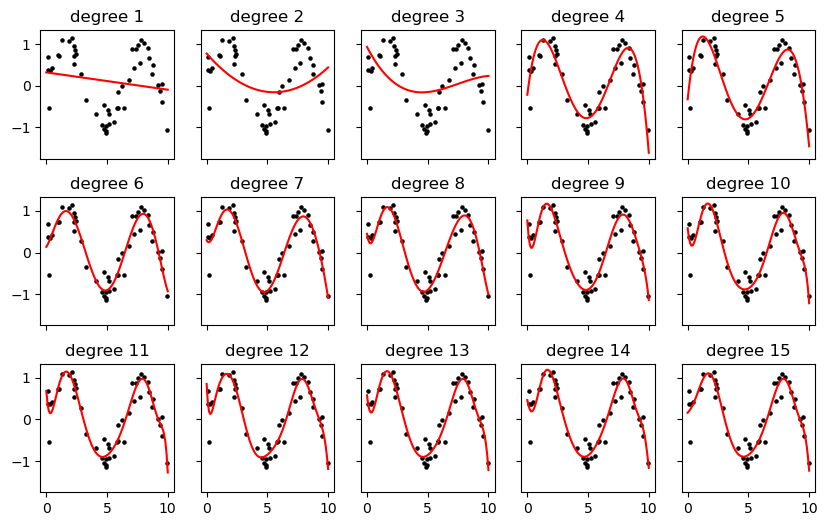

In [27]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
X = np.linspace(0, 10, 100).reshape(-1, 1)

for ax, degree in zip(axes.flat, range(1, 16)):
    ax.scatter(X_train, y_train, color='k', s=5)
    
    reg = PolynomialRegression(degree)
    reg.fit(X_train, y_train)
    
    y = reg.predict(X)    
    ax.plot(X, y, color='r')
    ax.set_title(f'degree {degree}')
    
plt.show()

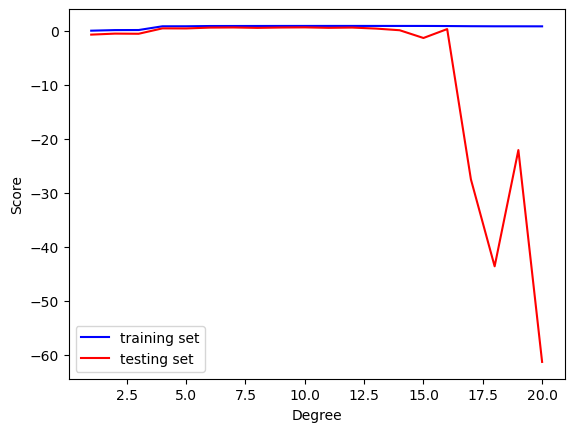

In [28]:
from sklearn.model_selection import validation_curve

degree = np.arange(1, 21)
train_scores, val_scores = validation_curve(
                                PolynomialRegression(), 
                                X_train, y_train, 
                                param_name='poly__degree', 
                                param_range=degree, 
                                cv=10
                           )
plt.plot(degree, np.mean(train_scores, axis=1), 'b', label='training set')
plt.plot(degree, np.mean(val_scores, axis=1), 'r', label='testing set')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Score')

plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': np.arange(1, 21),
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'poly__degree': 10}
